# Explore the Flights dataset

The `flights.csv` file in the `datasets` folder contains the dataset that we are going to explore for this practice. It is a dataset containing all the flights from New York airports downloaded using [this](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236) site.

## Loading Libraries and the data

In [1]:
import pandas as pd
import seaborn as sns

flights = pd.read_csv("../datasets/flights.csv")

## Questions

1. Which columns have missing values?

In [2]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [3]:
flights.isna().any()

year              False
month             False
day               False
dep_time           True
sched_dep_time    False
dep_delay          True
arr_time           True
sched_arr_time    False
arr_delay          True
carrier           False
flight            False
tailnum            True
origin            False
dest              False
air_time           True
distance          False
hour              False
minute            False
time_hour         False
dtype: bool

2. Show the distribution of the arrival delay. What can you say about this variable?

/home/wim/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


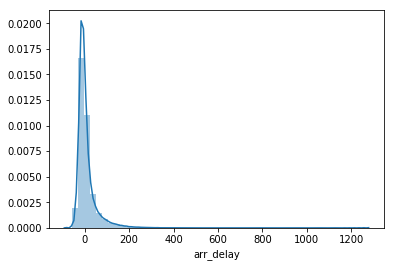

In [4]:
arr_delay_notnull = flights.loc[flights['arr_delay'].notnull(), 'arr_delay']
sns.distplot(arr_delay_notnull)

3. How many flights are there on first of January 2013?

In [5]:
flights_1_jan = flights[(flights['day']==1) & 
                        (flights['month']==1)]
flights_1_jan.shape[0]

842

4. What is the largest distance (in km!) between two airports? Also give the names of the airports.

In [6]:
flights.sort_values(by=['distance'], ascending=False)
flights['distance_km'] = flights['distance'] * 1.6
flights.loc[1, ['distance_km', 'origin', 'dest']]

distance_km    2265.6
origin            LGA
dest              IAH
Name: 1, dtype: object

5. How many different destinations are there?

In [7]:
flights['dest'].unique().size

105

6. What is the most popular destination in January 2013?

In [13]:
flights_jan = flights[flights['month']==1]
(flights_jan
    .groupby('dest')
    .size()
    .reset_index(name='counts')
    .sort_values(by=['counts'], ascending=False)).head()

,dest,counts
1,ATL,1396
60,ORD,1269
7,BOS,1245
46,MCO,1175
30,FLL,1161


7. What is the median of the distance of all the flights with carrier `DL`?

In [9]:
flights.loc[flights['carrier']=='DL', 'distance'].median()

1020.0

8. Show in a graph if more flights arrive with a delayed or on time.

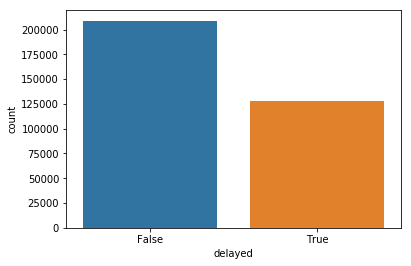

In [10]:
flights['delayed'] = flights['arr_time'] > flights['sched_arr_time']
sns.countplot(x='delayed', data=flights)

9. Show in a graph what the most popular times are for a flight to take off.

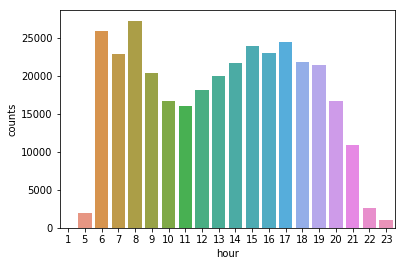

In [11]:
flights_counts = flights.groupby('hour').size().reset_index(name="counts")
sns.barplot(x="hour", y="counts", data=flights_counts)

10. Show in a graph the ratio of delayed flights per origin

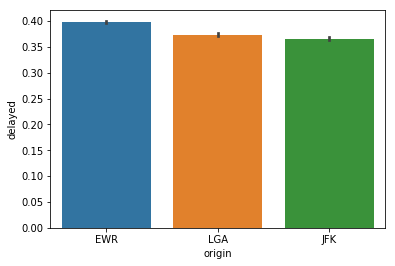

In [12]:
#sns.countplot(x="origin", hue="delayed", data=flights)
sns.barplot(x="origin", y="delayed", data=flights)